In [15]:
# Install pip packages in the current Jupyter kernel

import sys
# !{sys.executable} -m pip install numpy
# !{sys.executable} -m pip install pandas
# !{sys.executable} -m pip install matplotlib==3.0.3
# !{sys.executable} -m pip install seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import json

# 커널을 구성하다보면 에러는 아니지만, 빨간색 네모 박스 warning이 뜨는 경우를 제거 
import warnings
warnings.filterwarnings('ignore')

# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 라인
%matplotlib inline
# os 패키지를 통해 현재 디렉토리 위치를 변경하고, read_csv를 더 편리하게 함
import os
os.getcwd() # 현재 디렉토리 파악
os.chdir(r"D:\heeju\특화 프로젝트\DataAnalysis\DataSet") # 불러오고 싶은 파일이 위치한 주소를 ___에 입력

# 다른 노트북 작성할 때도 이 셀만 떼서 사용 가능하다.
import matplotlib.pyplot as plt 
import platform                

# 웬만하면 해주는 것이 좋다.
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']= False

if platform.system() == 'Darwin': # 맥os 사용자의 경우에
    plt.style.use('seaborn-darkgrid') 
    rc('font', family = 'AppleGothic')
    
elif platform.system() == 'Windows':# 윈도우 사용자의 경우에
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.style.use('seaborn-darkgrid') # https://python-graph-gallery.com/199-matplotlib-style-sheets/
    rc('font', family=font_name)

# 한글이 들어간 csv는 encoding 인자를 넣어주는 것이 좋음
df=pd.read_csv("서울시 상권분석서비스(아파트-상권).csv",encoding='euc-kr') 
df.head()

# 데이터 shape 파악
df.shape

(16712, 20)

In [16]:
# 기준_년분기_코드를 날짜 형식으로 변환
df['기준_년분기_코드'] = pd.to_datetime(df['기준_년분기_코드'], format='%Y%m')

# 새로운 년도 열 생성
df['Year'] = df['기준_년분기_코드'].dt.year

# 특정 상권 코드 설정
target_market_code = 3110014

# 특정 상권에 해당하는 데이터 필터링
target_market_data = df[df['상권_코드'] == target_market_code]

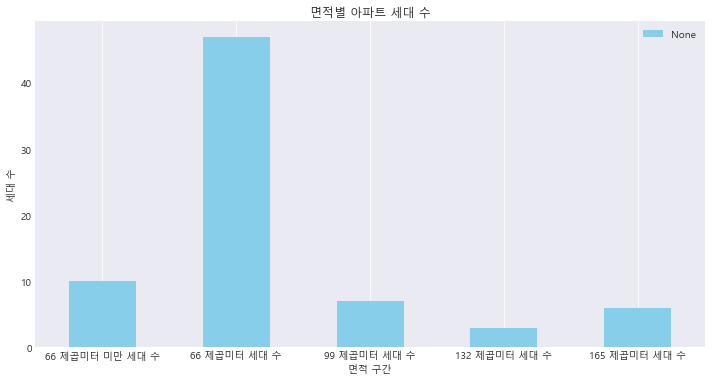

In [21]:
# 면적별 세대수 데이터 추출
area_data = target_market_data[target_market_data['Year'] == 2023][['아파트_면적_66_제곱미터_미만_세대_수', '아파트_면적_66_제곱미터_세대_수','아파트_면적_99_제곱미터_세대_수', '아파트_면적_132_제곱미터_세대_수',
                '아파트_면적_165_제곱미터_세대_수']].mean()

# 바 차트 그리기
plt.figure(figsize=(12, 6))
area_data.index = [' '.join(item.split('_')[2:]) for item in area_data.index]  # '_'로 나누어 첫 번째 부분만 사용
area_data.plot(kind='bar', color='skyblue')
plt.title('면적별 아파트 세대 수')
plt.xlabel('면적 구간')
plt.ylabel('세대 수')
plt.legend()
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

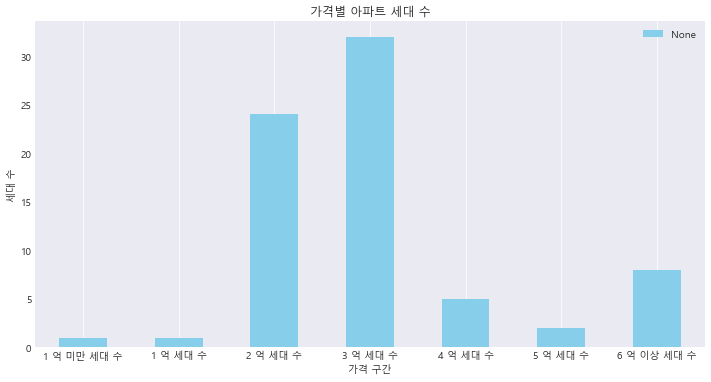

In [24]:
# 가격별 세대수 데이터 추출
price_data = target_market_data[target_market_data['Year'] == 2023][['아파트_가격_1_억_미만_세대_수', '아파트_가격_1_억_세대_수',
                '아파트_가격_2_억_세대_수', '아파트_가격_3_억_세대_수', '아파트_가격_4_억_세대_수',
                '아파트_가격_5_억_세대_수', '아파트_가격_6_억_이상_세대_수']].mean()

# 바 차트 그리기
plt.figure(figsize=(12, 6))
price_data.index = [' '.join(item.split('_')[2:]) for item in price_data.index]  # '_'로 나누어 3번째 이후부터 index로 사용
price_data.plot(kind='bar', color='skyblue')
plt.title('가격별 아파트 세대 수')
plt.xlabel('가격 구간')
plt.ylabel('세대 수')
plt.legend()
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()